In [ ]:
from google.colab import files
# Upload your Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels


Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.56G/9.58G [02:06<00:00, 119MB/s]
100% 9.58G/9.58G [02:06<00:00, 81.5MB/s]


In [ ]:
 # Unzip the dataset
import zipfile
with zipfile.ZipFile('chest-xray-masks-and-labels.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/chest_xray_dataset')


In [ ]:
import os

dataset_dir = '/content/chest_xray_dataset'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))

/content/chest_xray_dataset/Lung Segmentation/NLM-ChinaCXRSet-ReadMe.docx
/content/chest_xray_dataset/Lung Segmentation/NLM-MontgomeryCXRSet-ReadMe.pdf
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0127_0.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0375_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0551_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0259_0.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0451_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0131_0.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0026_0.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0545_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0632_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0481_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/CHNCXR_0440_1.png
/content/chest_xray_dataset/Lung Segmentation/CXR_png/MC

**LOAD DATA**

In [ ]:
import os
import pandas as pd
from PIL import Image

**CLEAN DATA**

In [ ]:
# # @title Age
# from matplotlib import pyplot as plt
# df['Age'].plot(kind='hist', bins=20, title='Age')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
image_folder = 'chest_xray_dataset/Lung Segmentation/CXR_png/'
results_folder = 'chest_xray_dataset/Lung Segmentation/ClinicalReadings/'
mask_folder = 'chest_xray_dataset/Lung Segmentation/masks/'

data = []

for filename in os.listdir(results_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(results_folder, filename), 'r') as file:
            lines = file.readlines()
            if len(lines) < 2:
                continue
            gender_age = lines[0].strip().split()
            if len(gender_age) != 2:
                continue
            gender = gender_age[0].lower()
            age_with_units = gender_age[1]
            try:
                age = int(age_with_units.replace('yrs', ''))
            except ValueError:
                continue
            diagnosis = lines[1].strip().lower()

        image_base_name = filename.replace('.txt', '')
        image_path_png = os.path.join(image_folder, image_base_name + '.png')
        image_path_jpg = os.path.join(image_folder, image_base_name + '.jpg')

        if os.path.exists(image_path_png):
            image_path = image_path_png
        elif os.path.exists(image_path_jpg):
            image_path = image_path_jpg
        else:
            continue

        mask_path = os.path.join(mask_folder, image_base_name + '_mask.png')
        if not os.path.exists(mask_path):
            continue

        data.append([image_path, mask_path, gender, age, diagnosis])

df_mask = pd.DataFrame(data, columns=['Image', 'Mask', 'Gender', 'Age', 'Diagnosis'])

print(df_mask);

                                                 Image  \
0    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
..                                                 ...   
543  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
544  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
545  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
546  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
547  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                  Mask  Gender  Age  \
0    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   40   
1    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   21   
2    chest_xray_dataset/Lung Segmentation/masks/CHN...  female   22   
3    chest_xray_dat

In [ ]:
# Check for missing values
print("\nMissing values before dropping:")
print(df_mask.isnull().sum())

df_mask.dropna(inplace=True)

print("\nDataFrame after dropping missing values:")
print(df_mask.head())

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})
df_mask = df_mask[df_mask['Diagnosis'].notnull() & (df_mask['Diagnosis'] != '')]

print("\nCleaned DataFrame:")
print(df_mask.head())



Missing values before dropping:
Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64

DataFrame after dropping missing values:
                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask  Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   40   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   21   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   22   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...    male    3   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   60   

       Diagnosis  
0      right ptb  
1         normal  
2       left ptb  
3        

REFINE and VALIDATE

In [ ]:
print(df_mask.isnull().sum())
df_mask.dropna(inplace=True)  # Option to drop rows with missing values

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})

Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64


In [ ]:
df_mask['Age'] = df_mask['Age'].astype(int)

In [ ]:
df_mask.to_csv('cleaned_lung_xrays_data.csv', index=False)

In [ ]:
df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')
print(df_cleaned.head())
print(df_cleaned.info())

                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   40   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   21   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...      f   22   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...      f   60   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   56   

       Diagnosis  
0      right ptb  
1         normal  
2       left ptb  
3  bilateral ptb  
4      right ptb  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtyp

EDA

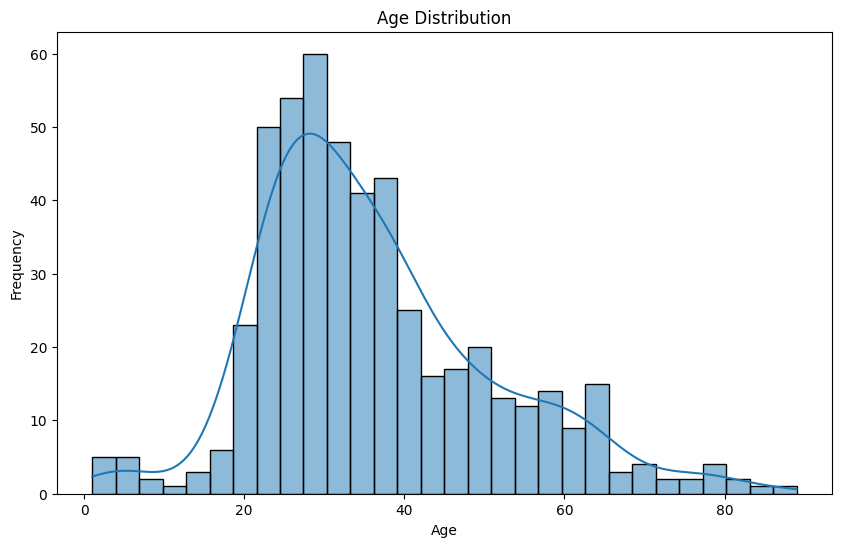

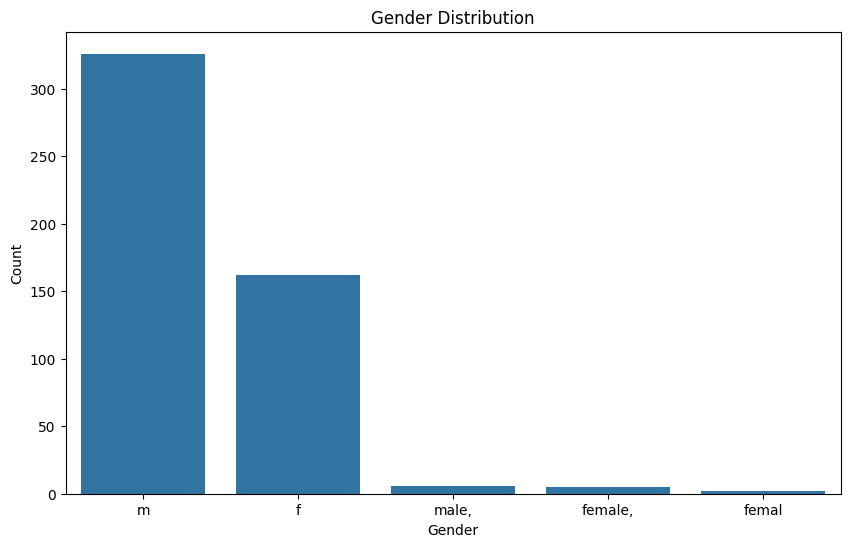

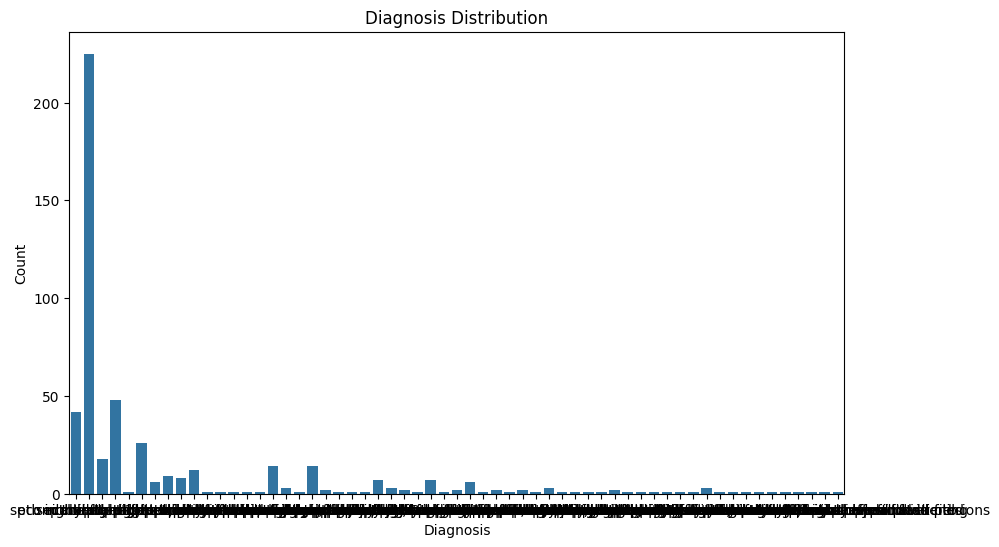

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df_cleaned)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

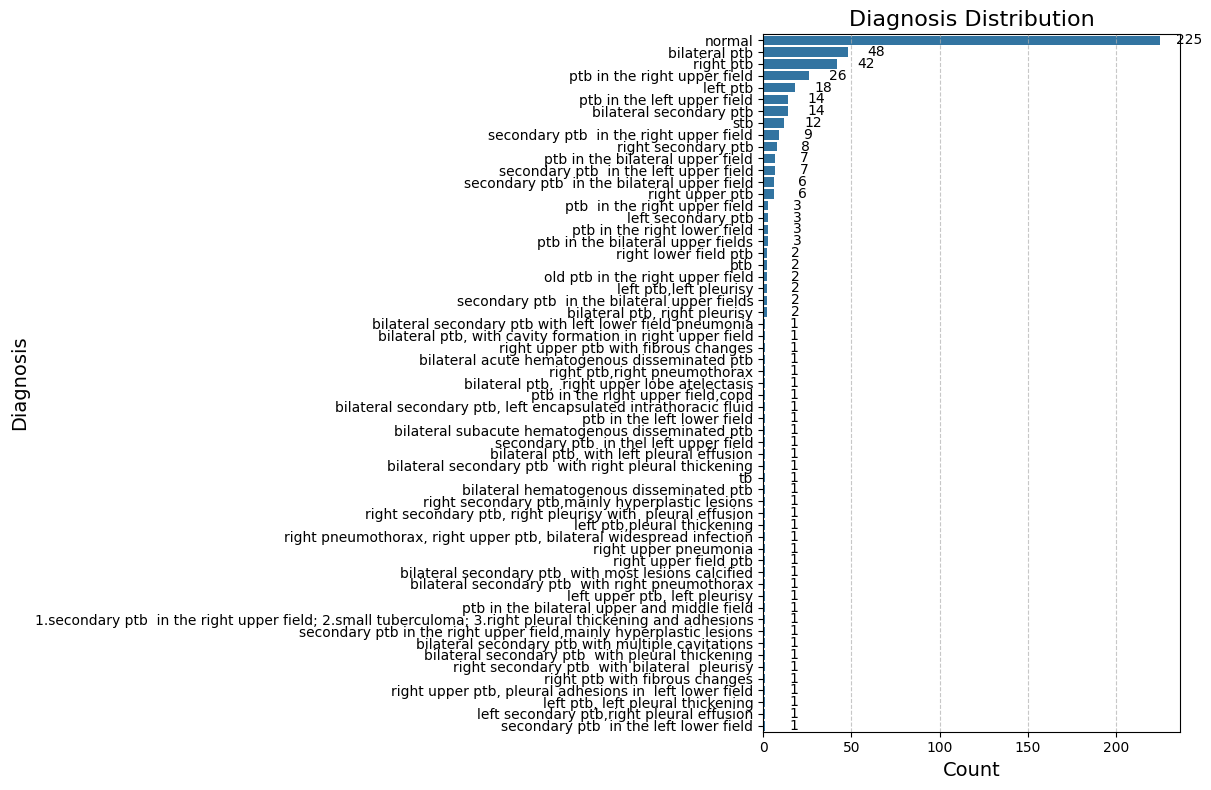

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Diagnosis', data=df_cleaned, order=df_cleaned['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_width(), '.0f'),
                       (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(20, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.head()

,Image,Mask,Gender,Age,Diagnosis
0,chest_xray_dataset/Lung Segmentation/CXR_png/C...,chest_xray_dataset/Lung Segmentation/masks/CHN...,m,40,right ptb
1,chest_xray_dataset/Lung Segmentation/CXR_png/C...,chest_xray_dataset/Lung Segmentation/masks/CHN...,m,21,normal
2,chest_xray_dataset/Lung Segmentation/CXR_png/C...,chest_xray_dataset/Lung Segmentation/masks/CHN...,f,22,left ptb
3,chest_xray_dataset/Lung Segmentation/CXR_png/C...,chest_xray_dataset/Lung Segmentation/masks/CHN...,f,60,bilateral ptb
4,chest_xray_dataset/Lung Segmentation/CXR_png/C...,chest_xray_dataset/Lung Segmentation/masks/CHN...,m,56,right ptb


Diagnosis
1    276
0    225
Name: count, dtype: int64
Unique classes in the 'Diagnosis' column: [1 0]
Found 400 validated image filenames belonging to 2 classes.
Found 101 validated image filenames belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/40
13/13 [==============================] - ETA: 0s - loss: 0.7315 - accuracy: 0.6600 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 437s 33s/step - loss: 0.7315 - accuracy: 0.6600 - val_loss: 0.6040 - val_accuracy: 0.6337 - lr: 1.0000e-05
Epoch 2/40
13/13 [==============================] - 433s 34s/step - loss: 0.6137 - accuracy: 0.7450 - val_loss: 0.5682 - val_accuracy: 0.7624 - lr: 1.0000e-05
Epoch 3/40
13/13 [==============================] - 432s 33s/step - loss: 0.5886 - accuracy: 0.7375 - val_loss: 0.5633 - val_accuracy: 0.7822 - lr: 1.0000e-05
Epoch 4/40
13/13 [==============================] - 431s 34s/step - loss: 0.4923 - accuracy: 0.7800 - val_loss: 0.5491 - val_accuracy: 0.7822 - lr: 1.0000e-05
Epoch 5/40
13/13 [==============================] - 439s 34s/step - loss: 0.4825 - accuracy: 0.7875 - val_loss: 0.5374 - val_accuracy: 0.7723 - lr: 1.0000e-05
Epoch 6/40
13/13 [==============================] - 438s 34s/step - loss: 0.4271 - accuracy: 0.8100 - val_loss: 0.5035 - val_accuracy: 0.7921 - lr: 1.0000e-05
Epoch 7/40
13/13 [==============================] - 440s 

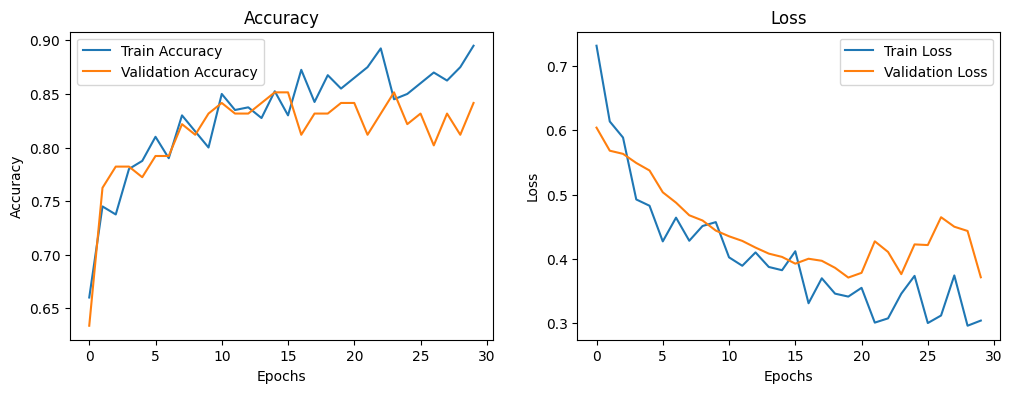

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Load the cleaned dataframe
df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')

df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda x: 0 if x == 'normal' else 1)
print(df_cleaned['Diagnosis'].value_counts())

# Ensure the Diagnosis column is in binary format (0 or 1)
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].astype(int)

# Verify that there are only two classes
unique_classes = df_cleaned['Diagnosis'].unique()
print(f"Unique classes in the 'Diagnosis' column: {unique_classes}")

assert len(unique_classes) == 2, "There should be exactly 2 unique classes for binary classification."

# Convert the Diagnosis column to string as required by ImageDataGenerator
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].astype(str)

# Parameters
img_height, img_width = 224, 224
batch_size = 32

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(img_height, img_width)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Prepare data
image_paths = df_cleaned["Image"].tolist()
labels = df_cleaned["Diagnosis"].tolist()

# Split data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create dataframes for training and validation sets
train_df = pd.DataFrame({
    'Image': train_paths,
    'Diagnosis': train_labels
})

val_df = pd.DataFrame({
    'Image': val_paths,
    'Diagnosis': val_labels
})

# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,  # Reduce rotation range
                                   width_shift_range=0.1,  # Reduce shift range
                                   height_shift_range=0.1,  # Reduce shift range
                                   shear_range=0.1,  # Reduce shear range
                                   zoom_range=0.1,  # Reduce zoom range
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Train and validation data generators
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="Image",
                                                    y_col="Diagnosis",
                                                    class_mode="binary",
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    shuffle=True)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col="Image",
                                                y_col="Diagnosis",
                                                class_mode="binary",
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                shuffle=False)

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout rate to prevent overfitting
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:15]:  # Freeze more layers
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=40,  # Reduce the number of epochs to avoid overfitting
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


4/4 [==============================] - 72s 14s/step
Accuracy: 0.8416
Precision: 0.8500
Recall: 0.8793
F1 Score: 0.8644
Confusion Matrix:
[[34  9]
 [ 7 51]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.85      0.88      0.86        58

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.84      0.84      0.84       101



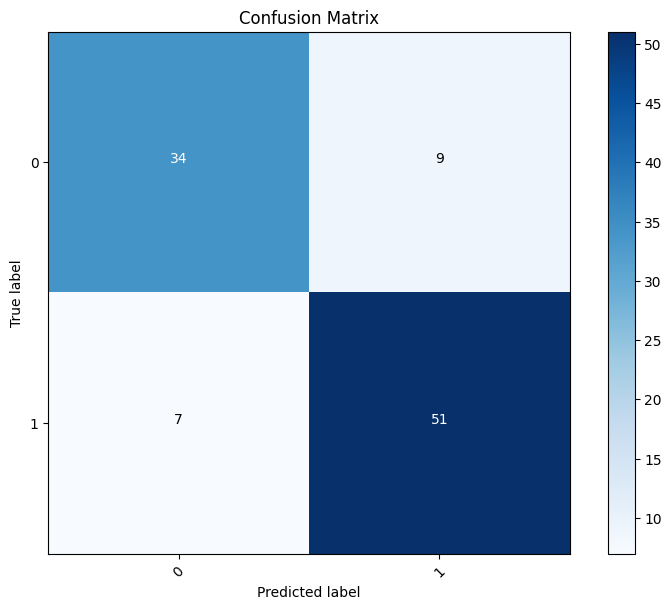

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import itertools  # Import itertools for advanced iteration



# Predict probabilities for validation set
val_generator.reset()  # Reset generator to beginning to ensure correct predictions
y_pred = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary class labels

# Get true labels
y_true = val_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_true, y_pred_classes)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true, y_pred_classes)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes)
print(f'F1 Score: {f1:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_names = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


1/1 [==============================] - 1s 1s/step


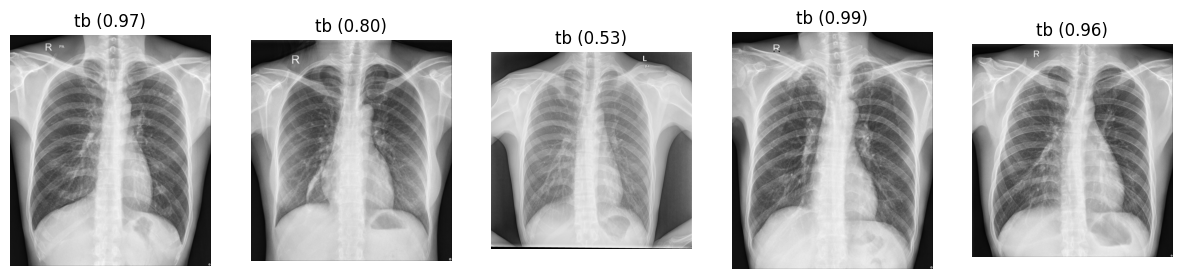

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths to the directories
image_folder = 'chest_xray_dataset/Lung Segmentation/CXR_png/'
results_folder = 'chest_xray_dataset/Lung Segmentation/ClinicalReadings/'
mask_folder = 'chest_xray_dataset/Lung Segmentation/masks/'

# Get list of all images in the image_folder
all_images = os.listdir(image_folder)

# Select 5 random samples
sample_images = random.sample(all_images, 5)

# Function to preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Function to make a prediction on a single image
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    return prediction

# Predict and display the results for 5 random samples
plt.figure(figsize=(15, 7))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(image_folder, image_name)
    prediction = predict_image(image_path, model)
    diagnosis = 'tb' if prediction > 0.5 else 'Normal'
    img = mpimg.imread(image_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{diagnosis} ({prediction[0][0]:.2f})")
    plt.axis('off')

plt.show()
